In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
from scipy import stats
from sklearn.model_selection import train_test_split

In [3]:
!pip install scikit-learn==0.21.2

     |████████████████████████████████| 6.7MB 6.4MB/s 
ERROR: umap-learn 0.5.1 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.21.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Dataset A

In [4]:
# Import The Dataset

from google.colab import files
uploadedA = files.upload()

Saving Company A - Data.csv to Company A - Data.csv


In [5]:
# datasets

dfA = pd.read_csv(io.StringIO(uploadedA["Company A - Data.csv"].decode('utf-8')))



# Total Charges

dfA = dfA[dfA.TotalCharges!=' ']
dfA.TotalCharges = pd.to_numeric(dfA.TotalCharges)

## Customer Segmentation Analysis

In [6]:
dfA.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [7]:
dfA.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,3534.770750,0.161647,32.523092,64.846687,2298.060617
std,2035.409858,0.368157,24.500858,30.107576,2274.127165
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1779.750000,0.000000,9.000000,35.750000,404.312500
50%,3548.000000,0.000000,29.000000,70.425000,1412.150000
75%,5293.500000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [8]:
dfA.shape

(5976, 22)

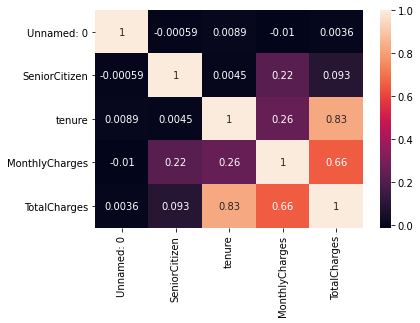

In [9]:
sns.heatmap(dfA.corr(), annot=True)

### Categorical Distributions by Churn

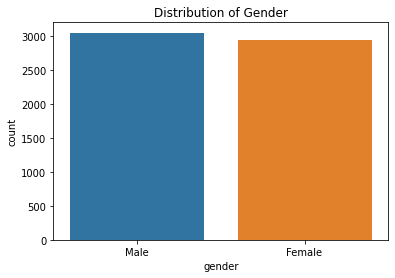

In [10]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='gender', data=dfA);
plt.title('Distribution of Gender');

# Slightly more men, although a fairly even gender split

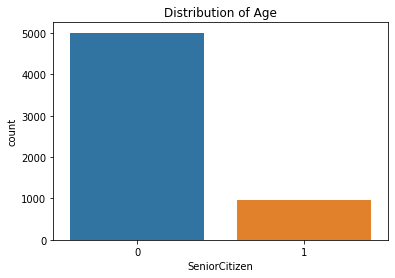

In [11]:
# See the distribution of Age to recognize different distributions
sns.countplot(x='SeniorCitizen', data=dfA);
plt.title('Distribution of Age');

# Mostly people who are still working

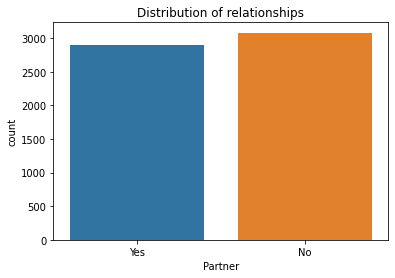

In [12]:
# See the distribution of relationships to recognize different distributions
sns.countplot(x='Partner', data=dfA);
plt.title('Distribution of relationships');

# Slightly more single people than people with partners

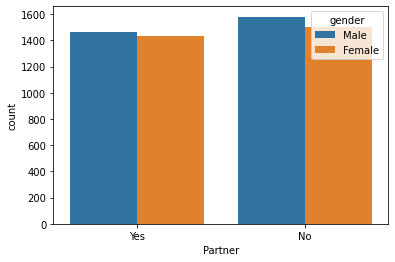

In [13]:
sns.countplot(x="Partner", hue="gender", data=dfA)

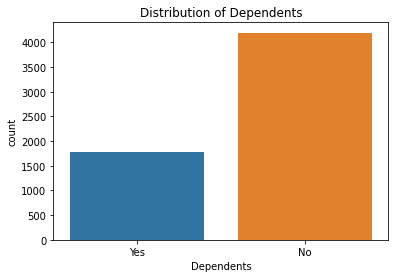

In [14]:
# See the distribution of Dependents to recognize different distributions
sns.countplot(x='Dependents', data=dfA);
plt.title('Distribution of Dependents');

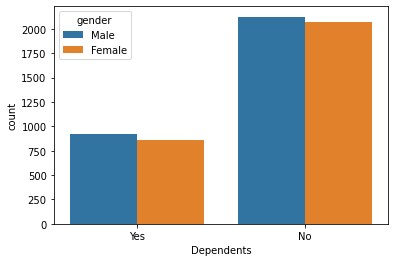

In [15]:
sns.countplot(x="Dependents", hue="gender", data=dfA)

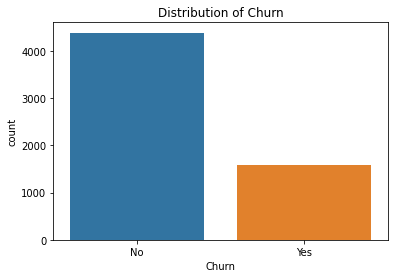

In [16]:
# See the distribution of Churn to recognize different distributions
sns.countplot(x='Churn', data=dfA);
plt.title('Distribution of Churn');

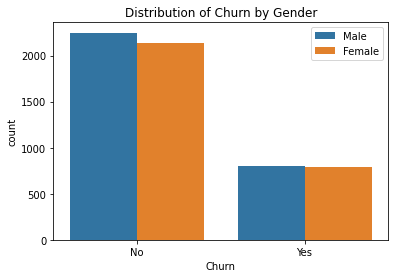

In [17]:
sns.countplot(x="Churn", hue="gender", data=dfA)
plt.title('Distribution of Churn by Gender');
plt.xlabel('Churn');
plt.legend();

# Churn seems unrelated to gender

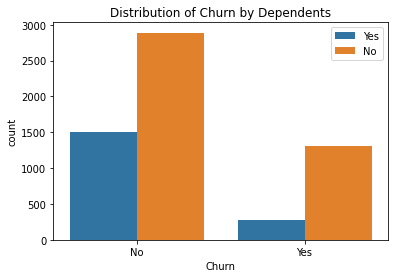

In [18]:
sns.countplot(x="Churn", hue="Dependents", data=dfA)
plt.title('Distribution of Churn by Dependents');
plt.xlabel('Churn');
plt.legend();

# The majority of people who do churn don't have any dependents

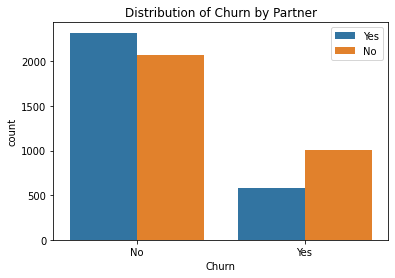

In [19]:
sns.countplot(x="Churn", hue="Partner", data=dfA)
plt.title('Distribution of Churn by Partner');
plt.xlabel('Churn');
plt.legend();

# Most people that churn are single

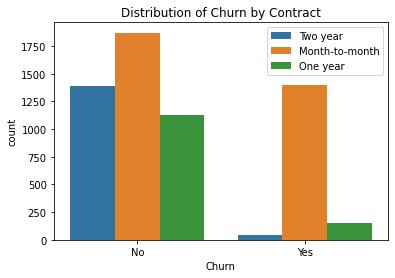

In [20]:
sns.countplot(x="Churn", hue="Contract", data=dfA)
plt.title('Distribution of Churn by Contract');
plt.xlabel('Churn');
plt.legend();

# Most people that churn are on a month-to-month contract

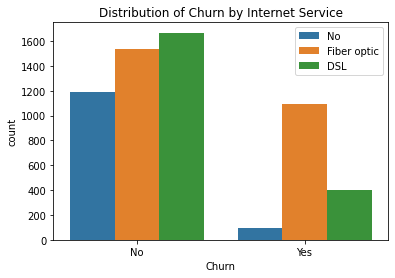

In [21]:
sns.countplot(x="Churn", hue="InternetService", data=dfA)
plt.title('Distribution of Churn by Internet Service');
plt.xlabel('Churn');
plt.legend();

# Most people that churn are paying for fiber optic

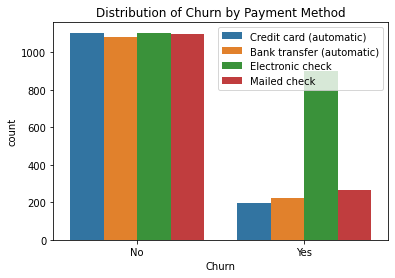

In [22]:
sns.countplot(x="Churn", hue="PaymentMethod", data=dfA)
plt.title('Distribution of Churn by Payment Method');
plt.xlabel('Churn');
plt.legend();

# Most people that churn are paying via online payments

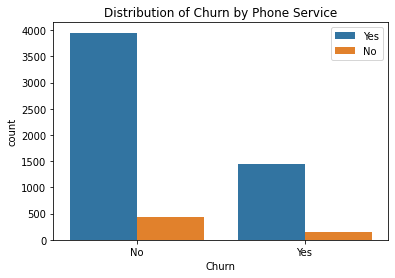

In [23]:
sns.countplot(x="Churn", hue="PhoneService", data=dfA)
plt.title('Distribution of Churn by Phone Service');
plt.xlabel('Churn');
plt.legend();

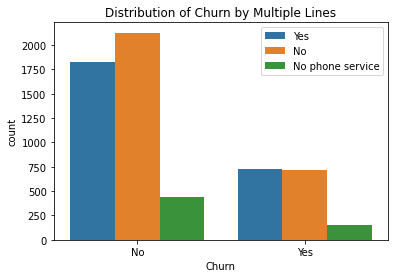

In [24]:
sns.countplot(x="Churn", hue="MultipleLines", data=dfA)
plt.title('Distribution of Churn by Multiple Lines');
plt.xlabel('Churn');
plt.legend();

# Most people that churn are paying via online payments

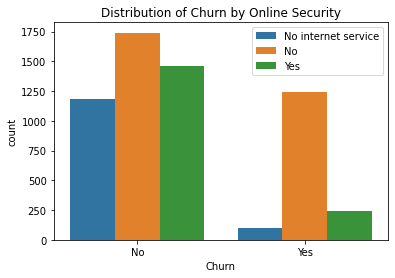

In [25]:
sns.countplot(x="Churn", hue="OnlineSecurity", data=dfA)
plt.title('Distribution of Churn by Online Security');
plt.xlabel('Churn');
plt.legend();

# No Online Security churn, Those with no Internet or who pay for security unlikely to churn

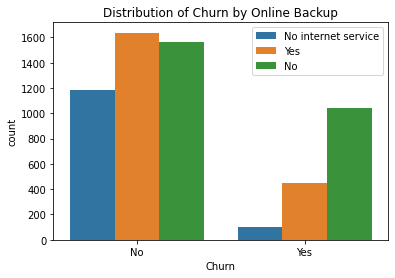

In [26]:
sns.countplot(x="Churn", hue="OnlineBackup", data=dfA)
plt.title('Distribution of Churn by Online Backup');
plt.xlabel('Churn');
plt.legend();

# Those without online backup the most likely to churn

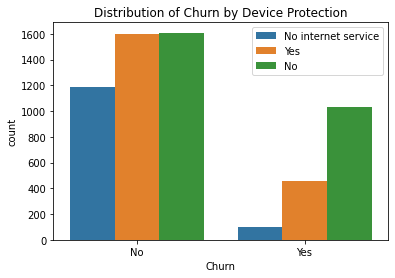

In [27]:
sns.countplot(x="Churn", hue="DeviceProtection", data=dfA)
plt.title('Distribution of Churn by Device Protection');
plt.xlabel('Churn');
plt.legend();

# Those without device protection most likely to churn

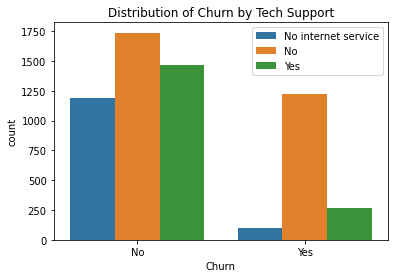

In [28]:
sns.countplot(x="Churn", hue="TechSupport", data=dfA)
plt.title('Distribution of Churn by Tech Support');
plt.xlabel('Churn');
plt.legend();

# Those without tech support most likely to churn

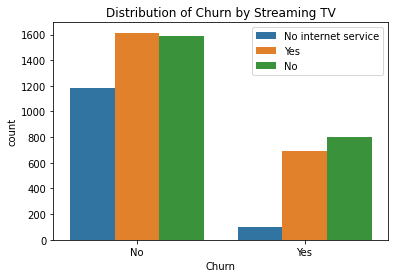

In [29]:
sns.countplot(x="Churn", hue="StreamingTV", data=dfA)
plt.title('Distribution of Churn by Streaming TV');
plt.xlabel('Churn');
plt.legend();

# Those without Streaming TV most likely to churn

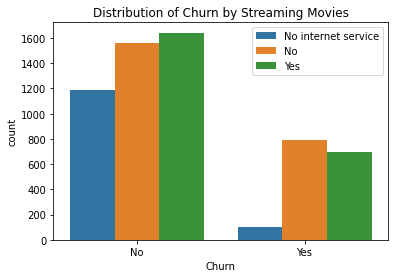

In [30]:
sns.countplot(x="Churn", hue="StreamingMovies", data=dfA)
plt.title('Distribution of Churn by Streaming Movies');
plt.xlabel('Churn');
plt.legend();

# Those without Streaming Movies most likely to churn

### Numerical Distributions by Churn

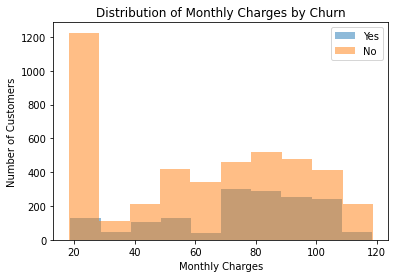

In [31]:
plt.hist('MonthlyCharges', data=dfA[dfA['Churn'] == 'Yes'], alpha=0.5, label='Yes');
plt.hist('MonthlyCharges', data=dfA[dfA['Churn'] == 'No'], alpha=0.5, label='No');
plt.title('Distribution of Monthly Charges by Churn');
plt.xlabel('Monthly Charges');
plt.ylabel('Number of Customers');
plt.legend();

# People paying over the median monthly rate were the most likely to churn, until they are paying about £110pm after which the churn rate plummets

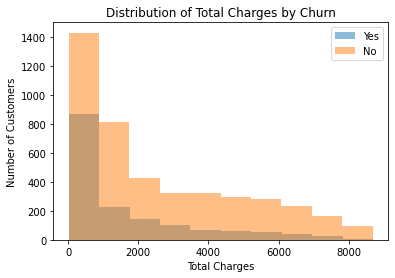

In [32]:
plt.hist('TotalCharges', data=dfA[dfA['Churn'] == 'Yes'], alpha=0.5, label='Yes');
plt.hist('TotalCharges', data=dfA[dfA['Churn'] == 'No'], alpha=0.5, label='No');
plt.title('Distribution of Total Charges by Churn');
plt.xlabel('Total Charges');
plt.ylabel('Number of Customers');
plt.legend();

# People paying the lowest total rates are by far the most likely to churn

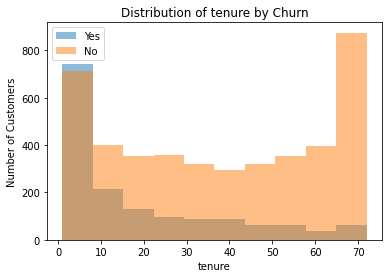

In [33]:
plt.hist('tenure', data=dfA[dfA['Churn'] == 'Yes'], alpha=0.5, label='Yes');
plt.hist('tenure', data=dfA[dfA['Churn'] == 'No'], alpha=0.5, label='No');
plt.title('Distribution of tenure by Churn');
plt.xlabel('tenure');
plt.ylabel('Number of Customers');
plt.legend();

# People with lowest tenures are almost entirely the ones leaving, while those with the highest tenures almost never leave

From this analysis it seems that people who churn are usually single, tech-savvy and are only look to pay for phone and internet service. They have a median amount of disposable income and tend to go for the cheaper per payment monthly payments rather than locking into longer contracts

### Data Treatment

In [34]:
# drop unnecessary columns
dfA.drop(['Unnamed: 0'], axis='columns',inplace=True)

In [35]:
dfA.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [36]:
# Yes/No - convert to 1s & 0s
dfA.replace('No internet service','No',inplace=True)
dfA.replace('No phone service','No',inplace=True)
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    dfA[col].replace({'Yes': 1,'No': 0},inplace=True)

In [37]:
# Gender
dfA['gender'].replace({'Female':1,'Male':0},inplace=True)

In [38]:
# One hot encoding categorical variables
dfA = pd.get_dummies(data=dfA, columns=['InternetService'])
dfA = pd.get_dummies(data=dfA, columns=['Contract'])
dfA = pd.get_dummies(data=dfA, columns=['PaymentMethod'])

dfA

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7010-BRBUU,0,0,1,1,72,1,1,0,0,0,0,0,0,0,24.10,1734.65,0,0,0,1,0,0,1,0,1,0,0
1,9688-YGXVR,1,0,0,0,44,1,0,0,1,1,0,1,0,1,88.15,3973.20,0,0,1,0,1,0,0,0,1,0,0
2,9286-DOJGF,1,1,1,0,38,1,1,0,0,0,0,0,0,1,74.95,2869.85,1,0,1,0,1,0,0,1,0,0,0
3,6994-KERXL,0,0,0,0,4,1,0,0,0,0,0,0,1,1,55.90,238.50,0,1,0,0,1,0,0,0,0,1,0
4,2181-UAESM,0,0,0,0,2,1,0,1,0,1,0,0,0,0,53.45,119.50,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,0,0,1,0,1,1,0,1,0,0,0,1,1,1,95.00,95.00,1,0,1,0,1,0,0,0,0,1,0
5982,5982-PSMKW,1,0,1,1,23,1,1,1,1,1,1,1,1,1,91.10,2198.30,0,1,0,0,0,0,1,0,1,0,0
5983,8044-BGWPI,0,0,1,1,12,1,0,0,0,0,0,0,0,1,21.15,306.05,0,0,0,1,1,0,0,0,0,1,0
5984,7450-NWRTR,0,1,0,0,12,1,1,0,0,1,0,1,1,1,99.45,1200.15,1,0,1,0,1,0,0,0,0,1,0


In [39]:
# Group by Customer ID
customers = dfA.groupby(['customerID']).agg({
    'tenure': 'sum',
    'MonthlyCharges': 'sum',
    'TotalCharges': 'sum'})

customers

,tenure,MonthlyCharges,TotalCharges
customerID,,,
0002-ORFBO,9,65.60,593.30
0003-MKNFE,9,59.90,542.40
0004-TLHLJ,4,73.90,280.85
0011-IGKFF,13,98.00,1237.85
0013-EXCHZ,3,83.90,267.40
...,...,...,...
9986-BONCE,4,20.95,85.50
9987-LUTYD,13,55.15,742.90
9992-RRAMN,22,85.10,1873.70


In [40]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["tenure"] = stats.boxcox(customers['tenure'])[0]
customers_fix["MonthlyCharges"] = stats.boxcox(customers['MonthlyCharges'])[0]
customers_fix["TotalCharges"] = pd.Series(np.cbrt(customers['TotalCharges'])).values
customers_fix.tail()

,tenure,MonthlyCharges,TotalCharges
5971,1.942139,16.746375,4.405434
5972,4.913855,42.339012,9.056842
5973,6.860880,63.621979,12.328210
5974,0.816948,38.814705,4.526592
5975,12.931275,51.455032,16.664291


### Clustering

In [41]:
# Import library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalised = scaler.transform(customers_fix)

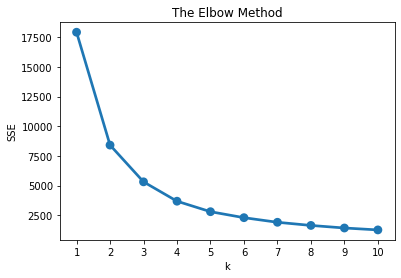

In [42]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalised)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [43]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalised)
model.labels_.shape

(5976,)

In [44]:
customers["Cluster"] = model.labels_

customers.groupby('Cluster').agg({
    'tenure':'mean',
    'MonthlyCharges':'mean',
    'TotalCharges':'mean'})

,tenure,MonthlyCharges,TotalCharges
Cluster,,,
0,41.250000,31.613411,1258.662682
1,49.944844,89.531795,4489.866567
2,6.089914,57.155875,367.592245


In [45]:
# Create the dataframe
dfA_normalized = pd.DataFrame(customers_normalised, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
dfA_normalized['ID'] = customers.index
dfA_normalized['Cluster'] = model.labels_
dfA_normalized['Churn'] = dfA['Churn']

In [46]:
# Melt The Data
dfA_nor_melt = pd.melt(dfA_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['tenure','MonthlyCharges','TotalCharges'],
                      var_name='Attribute',
                      value_name='Value')
dfA_nor_melt.head(20)
dfA_nor_melt.sort_values(by=['ID'], ascending=False)

,ID,Cluster,Attribute,Value
17927,9993-LHIEB,1,TotalCharges,1.076718
5975,9993-LHIEB,1,tenure,1.213197
11951,9993-LHIEB,1,MonthlyCharges,0.119428
17926,9992-UJOEL,2,TotalCharges,-1.399344
5974,9992-UJOEL,2,tenure,-1.521549
...,...,...,...,...
5977,0003-MKNFE,2,MonthlyCharges,-0.142026
11953,0003-MKNFE,2,TotalCharges,-0.659096
5976,0002-ORFBO,2,MonthlyCharges,0.045695
11952,0002-ORFBO,2,TotalCharges,-0.608604


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


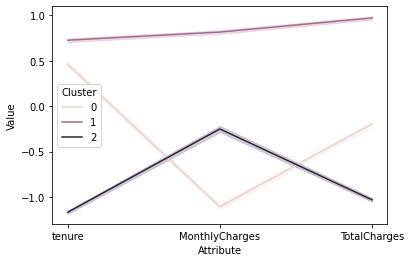

In [48]:
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=dfA_nor_melt)

In [56]:
cluster_avg = customers.groupby('Cluster').mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.drop("Cluster", axis=1)

,MonthlyCharges,TotalCharges,tenure
Cluster,,,
0,-0.512490,-0.452294,0.268330
1,0.380669,0.953763,0.535673
2,-0.118600,-0.840042,-0.812751


By using this plot, we know how each segment differs. It describes more than we use the summarized table.

We infer that cluster 0  has low tenure, spend a middling amount monthly, and the amount they pay drops off over time. Therefore, it could be the cluster of churned customers.

Then, the cluster 1 has high tenure, spend a lot monthly, and have consistenly paid for a long time. Therefore, it could be the cluster of a loyal customer.

Finally, the cluster 2 has high tenure, spend less monthly, but they have paid a decent amount over time. Therefore, it could be the cluster of newer customers or customers who invest in the optional features.

## Neural Network Predictions

In [ ]:
import sklearn
import tensorflow as tf
from tensorflow import keras

In [ ]:
Achurn_target = dfA['Churn']
Achurn_data = dfA.drop(['customerID', 'Churn'], axis=1)

Achurn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,72,1,1,0,0,0,0,0,0,0,24.10,1734.65,0,0,1,0,0,1,0,1,0,0
1,1,0,0,0,44,1,0,0,1,1,0,1,0,1,88.15,3973.20,0,1,0,1,0,0,0,1,0,0
2,1,1,1,0,38,1,1,0,0,0,0,0,0,1,74.95,2869.85,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,4,1,0,0,0,0,0,0,1,1,55.90,238.50,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,0,1,0,1,0,0,0,0,53.45,119.50,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,1,0,1,1,0,1,0,0,0,1,1,1,95.00,95.00,0,1,0,1,0,0,0,0,1,0
5982,1,0,1,1,23,1,1,1,1,1,1,1,1,1,91.10,2198.30,1,0,0,0,0,1,0,1,0,0
5983,0,0,1,1,12,1,0,0,0,0,0,0,0,1,21.15,306.05,0,0,1,1,0,0,0,0,1,0
5984,0,1,0,0,12,1,1,0,0,1,0,1,1,1,99.45,1200.15,0,1,0,1,0,0,0,0,1,0


In [ ]:
AX_train_full, AX_test, Ay_train_full, Ay_test = train_test_split(Achurn_data, Achurn_target)
AX_train, AX_valid, Ay_train, Ay_valid = train_test_split(AX_train_full, Ay_train_full)

scaler = StandardScaler()
AX_train = scaler.fit_transform(AX_train)
AX_valid = scaler.transform(AX_valid)

In [ ]:
class_names = ["Churn=No", "Churn=Yes"]

### Neural Network and Fine-tuning hyperparameters

In [ ]:
# To get it to work you need to install the lower verison 0.21.2
# un coment, install, and then restart

!pip install scikit-learn==0.21.2

In [ ]:
def build_model(n_hidden=1, n_neurons=38, learning_rate=3e-2, input_shape=AX_train.shape[1:]):

  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal"))
  model.add(keras.layers.Dense(1, activation="sigmoid"))
  

  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = keras_reg.fit(AX_train, Ay_train, epochs=100, validation_data=(AX_valid, Ay_valid), verbose=0, batch_size=64, callbacks=[early_stopping_cb])
mse_test = keras_reg.score(AX_test, Ay_test)

47/47 [==============================] - 0s 1ms/step - loss: 120.6742 - accuracy: 0.7316


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# Parameter space what we want explore
# Note that it exactly matches up to our build_model function parameters.

param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons": np.arange(20,50),
    "learning_rate": [3e-2,3e-3,3e-4]
}

# Set up the search - trying n_iter possibilities for cv folds
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=2)
rnd_search_cv.fit(AX_train, Ay_train, epochs=40, validation_data=(AX_valid, Ay_valid), batch_size=64, callbacks=[early_stopping_cb], verbose=0)

53/53 [==============================] - 0s 868us/step - loss: 0.4084 - accuracy: 0.8089


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa497f28390>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.03, 0.003, 0.0003],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
# So what are the best parameters that were found?
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'n_neurons': 25, 'n_hidden': 2, 'learning_rate': 0.03}
-0.4162804228285529


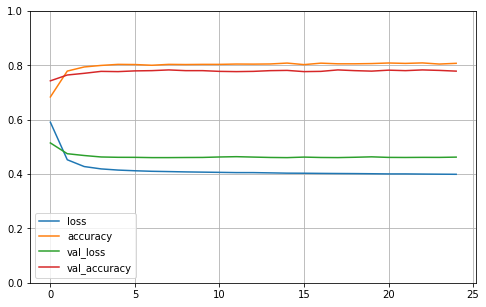

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# Create model with 'best' parameters
Model_A = build_model(n_hidden=2, n_neurons=25, learning_rate=3e-2, input_shape=AX_train.shape[1:])

# Save the model
Model_A.save("Model_A.h5")

# Destroy the model
Model_A = None

# Load the model
Model_A = keras.models.load_model("Model_A.h5")

# Summarise the model
Model_A.summary()

Model: "sequential_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_610 (Dense)            (None, 25)                675       
_________________________________________________________________
dense_611 (Dense)            (None, 25)                650       
_________________________________________________________________
dense_612 (Dense)            (None, 1)                 26        
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Model_A.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
# Add an early stopping to limit processing power being wasted
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = Model_A.fit(AX_train, Ay_train, epochs=30,
                    validation_data=(AX_valid, Ay_valid), batch_size=64, callbacks=[early_stopping_cb])

Epoch 1/30
53/53 [==============================] - 1s 5ms/step - loss: 0.8097 - accuracy: 0.4939 - val_loss: 0.5869 - val_accuracy: 0.6860
Epoch 2/30
53/53 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7205 - val_loss: 0.5285 - val_accuracy: 0.7297
Epoch 3/30
53/53 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7691 - val_loss: 0.5002 - val_accuracy: 0.7431
Epoch 4/30
53/53 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7765 - val_loss: 0.4854 - val_accuracy: 0.7493
Epoch 5/30
53/53 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7866 - val_loss: 0.4772 - val_accuracy: 0.7493
Epoch 6/30
53/53 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7979 - val_loss: 0.4716 - val_accuracy: 0.7574
Epoch 7/30
53/53 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.7976 - val_loss: 0.4684 - val_accuracy: 0.7618
Epoch 8/30
53/53 [==

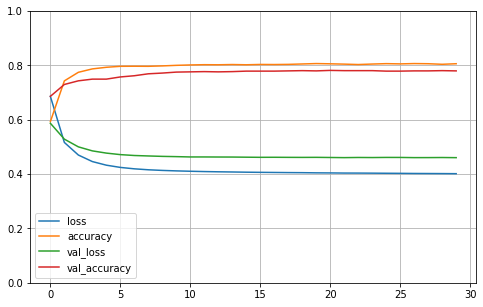

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
Model_A.evaluate(AX_valid, Ay_valid)

36/36 [==============================] - 0s 994us/step - loss: 0.4604 - accuracy: 0.7797


[0.4604414999485016, 0.7796609997749329]

In [ ]:
AX_new = AX_valid[:3]
Ay_proba = Model_A.predict(AX_new)
Ay_proba.round(2)

array([[0.09],
       [0.69],
       [0.21]], dtype=float32)

In [ ]:
Ay_pred = Model_A.predict_classes(AX_new)
print(Ay_pred)

np.array(class_names)[Ay_pred]

[[0]
 [1]
 [0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([['Churn=No'],
       ['Churn=Yes'],
       ['Churn=No']], dtype='<U9')

In [ ]:
# Here, the classifier actually classified all three relevance scores correctly

Ay_new = Ay_valid[:3]
print(Ay_new)

np.array(class_names)[Ay_new]

5749    0
93      1
5799    0
Name: Churn, dtype: int64


array(['Churn=No', 'Churn=Yes', 'Churn=No'], dtype='<U9')

## References


 - Daqing C., Sai L.S, and Kun G. Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining (2012), Journal of Database Marketing and Customer Strategy Management.
 - Millman K. J, Aivazis M. Python for Scientists and Engineers (2011), Computing in Science & Engineering.
 - Radečić D. Top 3 Methods for Handling Skewed Data (2020), Towards Data Science.
 - Elbow Method for optimal value of k in KMeans, Geeks For Geeks.

# Dataset B

## Customer Segmentation Analysis

In [ ]:
#uploadedB = files.upload()

Saving Company B - Data.csv to Company B - Data (2).csv


In [ ]:
#medianIncome = files.upload()

Saving Median State Incomes (From 2018 Census).csv to Median State Incomes (From 2018 Census) (2).csv


In [ ]:
# datasets
dfB = pd.read_csv(io.StringIO(uploadedB["Company B - Data.csv"].decode('utf-8')))

medianIncome = pd.read_csv(io.StringIO(medianIncome["Median State Incomes (From 2018 Census).csv"].decode('utf-8')))

In [ ]:
medianIncome['Median_Income ($)'] = medianIncome['Median_Income ($)'].astype(int)

In [ ]:
dfB.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
dfB.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
dfB.shape

(3333, 20)

In [ ]:
dfB['Total_minutes'] = dfB['Total day minutes'] + dfB['Total eve minutes'] + dfB['Total night minutes'] + dfB['Total intl minutes']
dfB['Total_calls'] = dfB['Total day calls'] + dfB['Total eve calls'] + dfB['Total night calls'] + dfB['Total intl calls']
dfB['Total_charge'] = dfB['Total day charge'] + dfB['Total eve charge'] + dfB['Total night charge'] + dfB['Total intl charge']

In [ ]:
df_churn = dfB.loc[dfB['Churn'] == True]

StateChurn = (df_churn.groupby(['State'])['Churn']
         .agg([('Churn_Count','count')])
         .reset_index())

df_not_churn = dfB.loc[dfB['Churn'] == False]

StateNotChurn = (df_not_churn.groupby(['State'])['Churn']
         .agg([('Not_Churn_Count','count')])
         .reset_index())

StateChurn['Not_Churn_Count'] = StateNotChurn['Not_Churn_Count']
StateChurn['Percentage_Churned'] = ((StateChurn['Churn_Count']/(StateChurn['Not_Churn_Count']+StateChurn['Churn_Count']))*100).round(2)

StateChurn.sort_values('Percentage_Churned',inplace=True)

StateChurn = pd.merge(StateChurn, medianIncome)

StateChurn.head()

# Churn seems strongly dependant on state and median income of said state

,State,Churn_Count,Not_Churn_Count,Percentage_Churned,Median_Income ($)
0,HI,3,50,5.66,80108
1,AK,3,49,5.77,68734
2,AZ,4,60,6.25,62283
3,VA,5,72,6.49,77151
4,IA,3,41,6.82,68718


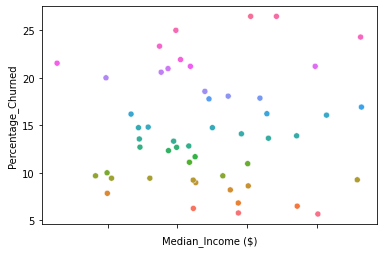

In [ ]:
churn_income_plot = sns.scatterplot(x=StateChurn['Median_Income ($)'], y=StateChurn['Percentage_Churned'], hue=StateChurn['State'])
churn_income_plot.xaxis.set_ticklabels([])
plt.legend([],[], frameon=False)

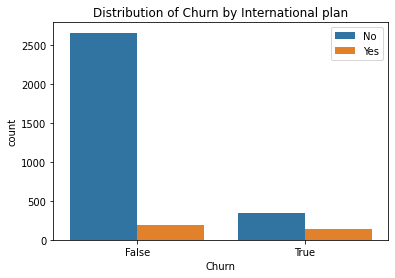

In [ ]:
sns.countplot(x="Churn", hue="International plan", data=dfB)
plt.title('Distribution of Churn by International plan');
plt.xlabel('Churn');
plt.legend();

# Those without International plan the most likely to churn

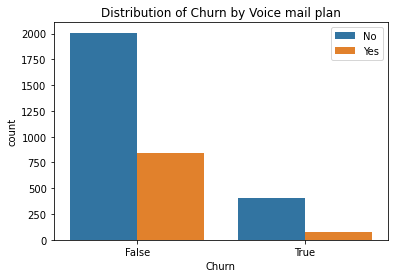

In [ ]:
sns.countplot(x="Churn", hue="Voice mail plan", data=dfB)
plt.title('Distribution of Churn by Voice mail plan');
plt.xlabel('Churn');
plt.legend();

# Those without Voice mail plan the most likely to churn

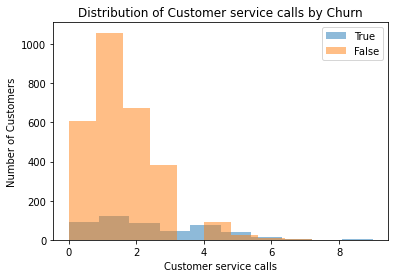

In [ ]:
plt.hist('Customer service calls', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Customer service calls', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Customer service calls by Churn');
plt.xlabel('Customer service calls');
plt.ylabel('Number of Customers');
plt.legend();

# Customers with 3-4 customer service calls are quite likely to churn

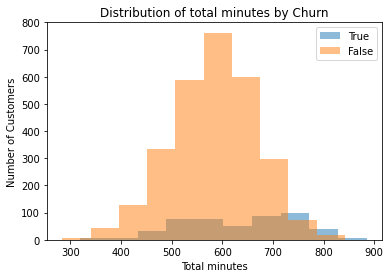

In [ ]:
plt.hist('Total_minutes', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total_minutes', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of total minutes by Churn');
plt.xlabel('Total minutes');
plt.ylabel('Number of Customers');
plt.legend();

# Customers with the most minutes are most likely to churn

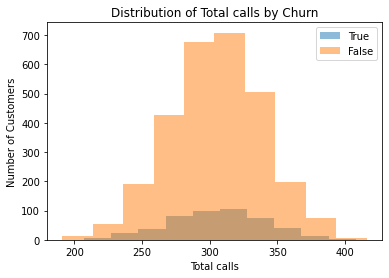

In [ ]:
plt.hist('Total_calls', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total_calls', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total calls by Churn');
plt.xlabel('Total calls');
plt.ylabel('Number of Customers');
plt.legend();

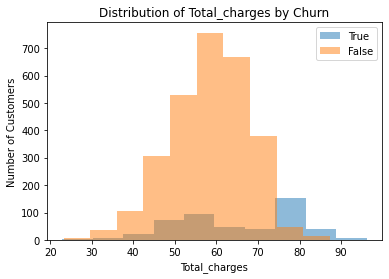

In [ ]:
plt.hist('Total_charge', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total_charge', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total_charges by Churn');
plt.xlabel('Total_charges');
plt.ylabel('Number of Customers');
plt.legend();

# People with the highest total charge seem to be the most likely to churn

Worth breaking down total minutes and total charges into individual pieces to see if trend still holds

### Total Minutes

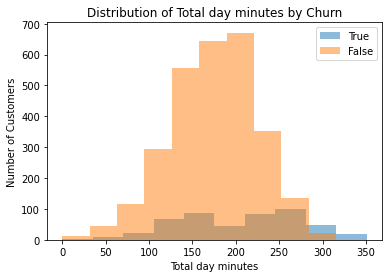

In [ ]:
plt.hist('Total day minutes', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total day minutes', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total day minutes by Churn');
plt.xlabel('Total day minutes');
plt.ylabel('Number of Customers');
plt.legend();

# Customers with the most day minutes are most likely to churn

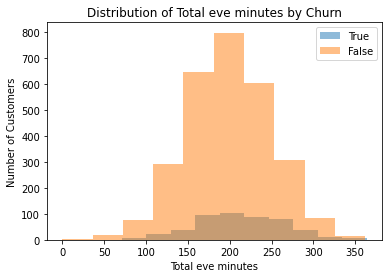

In [ ]:
plt.hist('Total eve minutes', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total eve minutes', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total eve minutes by Churn');
plt.xlabel('Total eve minutes');
plt.ylabel('Number of Customers');
plt.legend();

# eve minutes has minimal effect

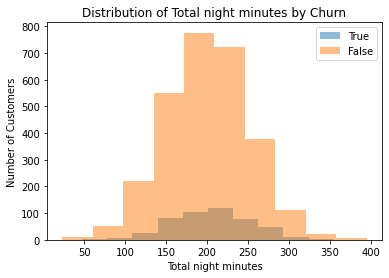

In [ ]:
plt.hist('Total night minutes', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total night minutes', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total night minutes by Churn');
plt.xlabel('Total night minutes');
plt.ylabel('Number of Customers');
plt.legend();

# night minutes have minimal effect

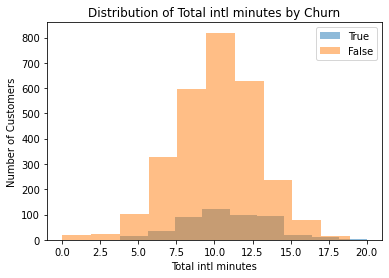

In [ ]:
plt.hist('Total intl minutes', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total intl minutes', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total intl minutes by Churn');
plt.xlabel('Total intl minutes');
plt.ylabel('Number of Customers');
plt.legend();

# international minutes have minimal effect

### Total Charges

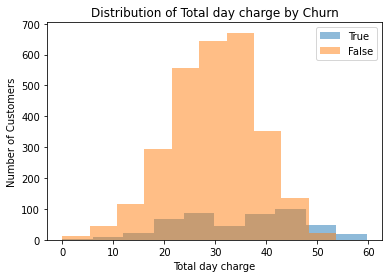

In [ ]:
plt.hist('Total day charge', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total day charge', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total day charge by Churn');
plt.xlabel('Total day charge');
plt.ylabel('Number of Customers');
plt.legend();

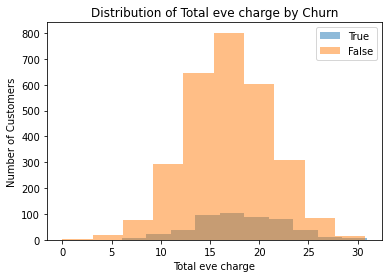

In [ ]:
plt.hist('Total eve charge', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total eve charge', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total eve charge by Churn');
plt.xlabel('Total eve charge');
plt.ylabel('Number of Customers');
plt.legend();

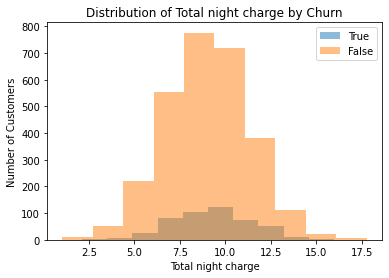

In [ ]:
plt.hist('Total night charge', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total night charge', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total night charge by Churn');
plt.xlabel('Total night charge');
plt.ylabel('Number of Customers');
plt.legend();

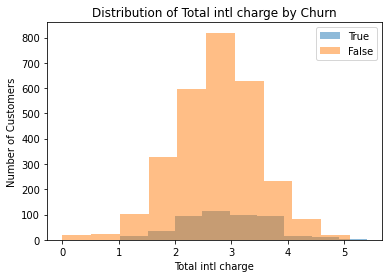

In [ ]:
plt.hist('Total intl charge', data=dfB[dfB['Churn'] == True], alpha=0.5, label='True');
plt.hist('Total intl charge', data=dfB[dfB['Churn'] == False], alpha=0.5, label='False');
plt.title('Distribution of Total intl charge by Churn');
plt.xlabel('Total intl charge');
plt.ylabel('Number of Customers');
plt.legend();

Churning seems most affected by day minutes and day charges

From this analysis it seems that people who churn live in states with higher median incomes, tech-savvy and are not looking to pay for any extra features. They tend to use their phones the most during the day, with heavy users or those with high charges being the most likely to churn

## Neural Network Predictions

### Data Treatment

In [ ]:
# drop unnecessary columns
dfB.drop(['Area code', 'Total_minutes',	'Total_calls',	'Total_charge'], axis='columns',inplace=True)

# Yes/No - convert to 1s & 0s
yes_no_columns = ['International plan','Voice mail plan']
for col in yes_no_columns:
    dfB[col].replace({'Yes': 1,'No': 0},inplace=True)

# True/False - convert to 1s & 0s
true_false_columns = ['Churn']
for col in true_false_columns:
    dfB[col].replace({True: 1,False: 0},inplace=True)

In [ ]:
# One hot encoding categorical variables
dfB = pd.get_dummies(data=dfB, columns=['State'])

dfB

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3329,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3330,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3331,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import sklearn
import tensorflow as tf
from tensorflow import keras

In [ ]:
Bchurn_target = dfB['Churn']
Bchurn_data = dfB.drop(['Churn'], axis=1)

Bchurn_data

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3329,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3330,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3331,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
BX_train_full, BX_test, By_train_full, By_test = train_test_split(Bchurn_data, Bchurn_target)
BX_train, BX_valid, By_train, By_valid = train_test_split(BX_train_full, By_train_full)

scaler = StandardScaler()
BX_train = scaler.fit_transform(BX_train)
BX_valid = scaler.transform(BX_valid)

In [ ]:
class_names = ["Churn=No", "Churn=Yes"]

### Neural Network and Fine-tuning hyperparameters

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=BX_train.shape[1:]):

  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal"))
  model.add(keras.layers.Dense(1, activation="sigmoid"))
  

  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = keras_reg.fit(BX_train, By_train, epochs=100, validation_data=(BX_valid, By_valid), batch_size=32, verbose=0, callbacks=[early_stopping_cb])
mse_test = keras_reg.score(BX_test, By_test)

27/27 [==============================] - 0s 1ms/step - loss: 211.4738 - accuracy: 0.1559


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# Parameter space what we want explore
# Note that it exactly matches up to our build_model function parameters.

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(20,50),
    "learning_rate": [3e-2,3e-3,3e-4]
}

# Set up the search - trying n_iter possibilities for cv folds
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=2)
rnd_search_cv.fit(BX_train, By_train, epochs=50, validation_data=(BX_valid, By_valid), batch_size=32, callbacks=[early_stopping_cb], verbose=0)

30/30 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.7161


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa4b007ab10>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.03, 0.003, 0.0003],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
# So what are the best parameters that were found?
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'n_neurons': 48, 'n_hidden': 3, 'learning_rate': 0.03}
-0.35323579609394073


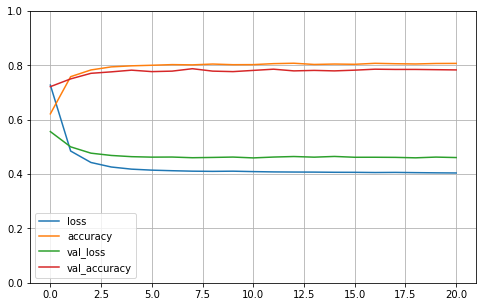

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# Create model with 'best' parameters
ModelB =build_model(n_hidden=3, n_neurons=48, learning_rate=3e-2, input_shape=BX_train.shape[1:])

# Save the model
ModelB.save("ModelB.h5")

# Destroy the model
ModelB = None

# Load the model
ModelB = keras.models.load_model("ModelB.h5")

# Summarise the model
ModelB.summary()

Model: "sequential_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_553 (Dense)            (None, 48)                3312      
_________________________________________________________________
dense_554 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_555 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_556 (Dense)            (None, 1)                 49        
Total params: 8,065
Trainable params: 8,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ModelB.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
# Add an early stopping to limit processing power being wasted
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = ModelB.fit(BX_train, By_train, epochs=30,
                    validation_data=(BX_valid, By_valid), batch_size=32,callbacks=[early_stopping_cb])

Epoch 1/30
59/59 [==============================] - 1s 5ms/step - loss: 0.7291 - accuracy: 0.5944 - val_loss: 0.4731 - val_accuracy: 0.8224
Epoch 2/30
59/59 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8421 - val_loss: 0.3891 - val_accuracy: 0.8560
Epoch 3/30
59/59 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8683 - val_loss: 0.3604 - val_accuracy: 0.8528
Epoch 4/30
59/59 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8625 - val_loss: 0.3454 - val_accuracy: 0.8608
Epoch 5/30
59/59 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8574 - val_loss: 0.3370 - val_accuracy: 0.8608
Epoch 6/30
59/59 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8779 - val_loss: 0.3343 - val_accuracy: 0.8608
Epoch 7/30
59/59 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8802 - val_loss: 0.3312 - val_accuracy: 0.8624
Epoch 8/30
59/59 [==

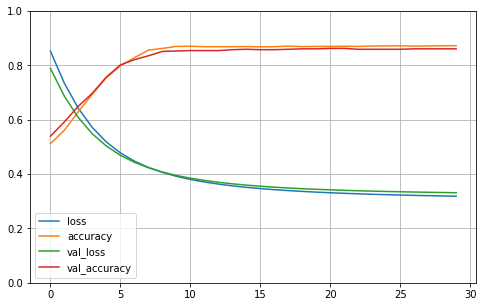

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
ModelB.evaluate(BX_valid, By_valid)

20/20 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8608


[0.3313879072666168, 0.86080002784729]

In [ ]:
BX_new = BX_valid[:3]
By_proba = ModelB.predict(BX_new)
By_proba.round(2)

array([[0.21],
       [0.06],
       [0.09]], dtype=float32)

In [ ]:
By_pred = ModelB.predict_classes(BX_new)
print(By_pred)

np.array(class_names)[By_pred]

[[0]
 [0]
 [0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([['Churn=No'],
       ['Churn=No'],
       ['Churn=No']], dtype='<U9')

In [ ]:
# Here, the classifier actually classified all three relevance scores correctly

By_new = y_valid[:3]
print(By_new)

np.array(class_names)[By_new]

2329    0
851     0
2610    1
Name: Churn, dtype: int64


array(['Churn=No', 'Churn=No', 'Churn=Yes'], dtype='<U9')

## References

 - Ward Williams (Dec 7, 2020) Median Income by State, Available at: https://www.investopedia.com/median-income-by-state-5070640 (Accessed: 18th March 2021).